Name: Dheeraj Kumar Ambedkar  \n
School: CDS  \n

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import os
from google.colab import drive

2.17.1


In [ ]:
import os
import glob
import PIL
from PIL import Image

In [ ]:
from google.colab import drive
import glob

# Mount Google Drive
drive.mount('/content/drive')






Mounted at /content/drive


In [ ]:
# Load the saved data from Google Drive
X_train_std = np.load("/content/drive/MyDrive/Processed_data/X_train_std.npy")
y_train = np.load("/content/drive/MyDrive/Processed_data/y_train.npy")
X_test_std = np.load("/content/drive/MyDrive/Processed_data/X_test_std.npy")
y_test = np.load("/content/drive/MyDrive/Processed_data/y_test.npy")
y = np.load("/content/drive/MyDrive/Processed_data/y.npy")

In [ ]:
# Load the saved best model

model1_FineTune = keras.models.load_model('/content/drive/MyDrive/Models/XceptionV3_TransferLearning_Best_Model.h5')

In [ ]:
model1_FineTune.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, None, None, 32) │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, None, None, 32) │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, None, None, 32) │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, None, None, 64) │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, None, None, 64) │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, None, None, 64) │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, None, None,     │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, None, None,     │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, None, None,     │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, None, None,     │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, None, None,     │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, None, None,     │          8,192 │ block1_conv2_act[0][0] │
│                           │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, None, None,     │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)       

 Total params: 20,875,821 (79.63 MB)

 Trainable params: 20,817,195 (79.41 MB)

 Non-trainable params: 58,624 (229.00 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
x = 0
for layer in model1_FineTune.layers[:]:
  x = x+1
print(x)

136


In [ ]:
# Fine-tune the model from index 60 onwards

for layer in model1_FineTune.layers[:35]:
  layer.trainable = False

for layer in model1_FineTune.layers[35:]:
  layer.trainable = True

In [ ]:
model1_FineTune.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FineTune = [
             keras.callbacks.ModelCheckpoint("bestFT_1.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history_FineTune = model1_FineTune.fit(x = X_train_std, y = y_train, epochs=10,
                                      validation_split=0.1, batch_size=16, callbacks=callbacks_FineTune)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 467s 16s/step - accuracy: 0.9380 - loss: 0.3463 - val_accuracy: 0.9200 - val_loss: 0.1618
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 459s 16s/step - accuracy: 0.9713 - loss: 0.1186 - val_accuracy: 0.9200 - val_loss: 0.2664
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 483s 16s/step - accuracy: 0.9865 - loss: 0.0960 - val_accuracy: 0.9600 - val_loss: 0.0513
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 437s 16s/step - accuracy: 0.9968 - loss: 0.0289 - val_accuracy: 0.6600 - val_loss: 11.9002
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 454s 16s/step - accuracy: 0.9903 - loss: 0.0515 - val_accuracy: 0.7400 - val_loss: 6.4939
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 493s 16s/step - accuracy: 0.9883 - loss: 0.0674 - val_accuracy: 1.0000 - val_loss: 0.0082
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 441s 16s/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0149
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 448s 16s/step - accuracy: 1.0000 - loss: 6.2237e-04 - val_accurac

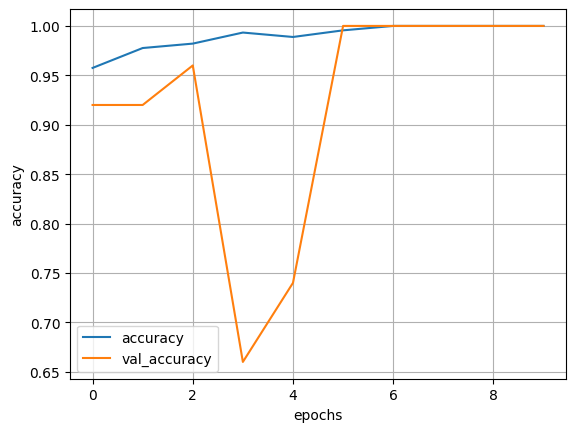

In [ ]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_FineTune.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
testLoss_FineTune, testAccuracy_FineTune = model1_FineTune.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

6/6 ━━━━━━━━━━━━━━━━━━━━ 62s 10s/step - accuracy: 1.0000 - loss: 0.0034
Test-loss: 0.006241, Test-accuracy: 1.000000


In [ ]:
model1_FineTune.load_weights("bestFT_1.weights.h5")

testLoss_FineTune, testAccuracy_FineTune = model1_FineTune.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

6/6 ━━━━━━━━━━━━━━━━━━━━ 59s 9s/step - accuracy: 0.9896 - loss: 0.0879
Test-loss: 0.102971, Test-accuracy: 0.987952


In [ ]:
Proba = model1_FineTune.predict(X_test_std[:1])

print(Proba)

cLabel = np.argmax(Proba, axis=-1)

print(cLabel)

print(y_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9994755e-01 1.4464761e-07 5.2384232e-05]]
[0]
[0]


In [ ]:
y_proba = model1_FineTune.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

6/6 ━━━━━━━━━━━━━━━━━━━━ 61s 10s/step
[0 0 0 2 1 1 0 0 0 0 0 0 0 2 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 2 1 1 2 0 1
 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 2 1 1 2 1 1 2 0 0 0 0 2
 0 1 0 0 2 1 0 0 0 1 1 2 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1
 0 0 1 1 0 1 2 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 2 0 2
 0 1 2 1 0 2 1 1 0 0 2 0 1 1 1 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[73,  2,  0],
       [ 0, 75,  0],
       [ 0,  0, 16]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.9882647473008919
Recall:  0.9879518072289156
F1-score:  0.9879496649471285






In [ ]:
# Saves the best model obtained
model1_FineTune.save('/content/drive/MyDrive/Models/XceptionV3_FineTuning  `_Best_Model.h5')